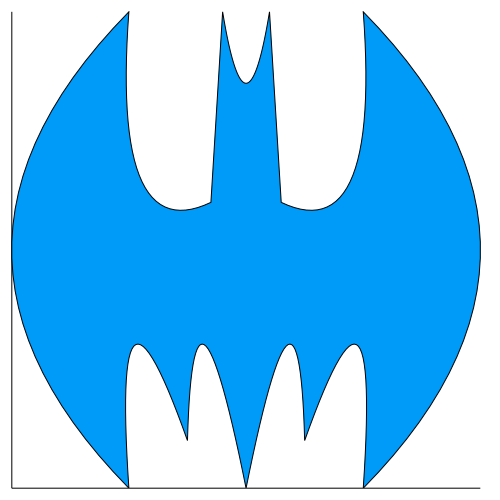

In [1]:
using Plots
gr(leg = false, grid = false, xticks = nothing, yticks = nothing, size=(500,500))

function make_batman()
    p = P2[(0.,0.), (0.5, 0.2), (1., 0.), (1.,2.),  (0.3,1.2), (0.2,2.), (0.,1.7)]
    m = P2[(p[i]+p[i+1])/2 for i=1:length(p)-1]
    m += P2[(0.2, 1.), (0.4, 1.), (2., 0.), (0.5, -0.6), (0.,0.), (0.,-0.15)]

    pts = P2[]
    for (i,mi) in enumerate(m)
        append!(pts, coords(BezierCurve(P2[p[i], m[i], p[i+1]])))
    end
    x, y = Plots.unzip(pts)
    Shape(vcat(x, -reverse(x)), vcat(y, reverse(y)))
end
plot(make_batman())

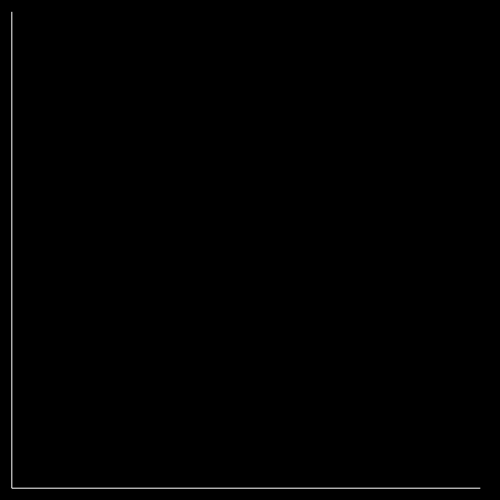

In [2]:
# background and limits
plt = plot(bg = :black, xlim = (0.1,0.9), ylim = (0.2,1.5))

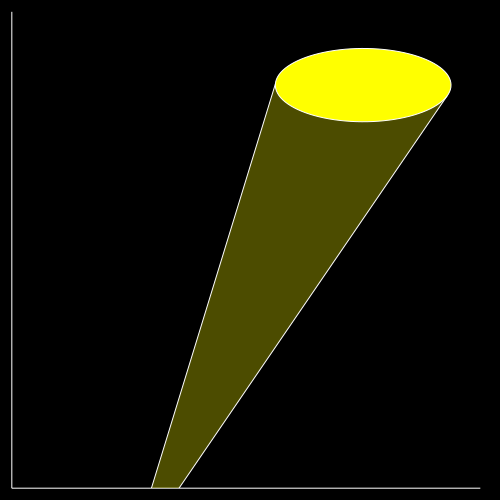

In [3]:
# create an ellipse in the sky
pts = Plots.partialcircle(0,2π,100,0.1)
x, y = Plots.unzip(pts)
x = 1.5x + 0.7
y += 1.3
pts = collect(zip(x, y))

# beam
beam = Shape([(0.3, 0.0), pts[95], pts[50]])
plot!(beam,fc = :yellow, fa=0.3)

# spotlight
plot!(Shape(x,y), c=:yellow)

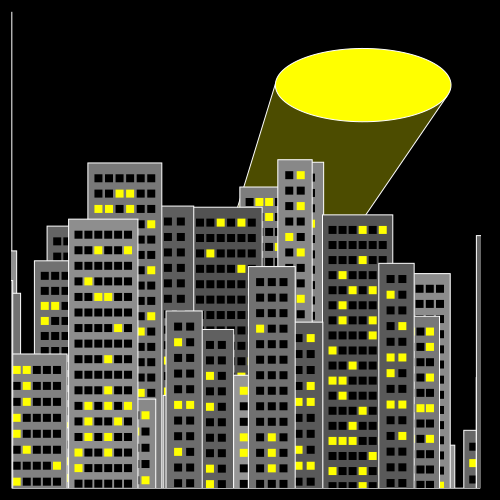

In [4]:
# buildings
rect(w, h, x, y) = Shape(x + [0,w,w,0], y + [0,0,h,h])
gray(pct) = RGB(pct,pct,pct)
function windowrange(dim, denom)
    linspace(0, 1, max(3, round(Int, dim/denom)))[2:end-1]
end

for k=1:50
    w, h, x, y = 0.1rand()+0.05, 0.8rand()+0.3, rand(), 0.0
    shape = rect(w, h, x, y)
    graypct = 0.3rand()+0.3
    plot!(shape, c = gray(graypct))
    
    # windows
    I = windowrange(w,0.015)
    J = windowrange(h,0.04)
    pts = vec([(Float64(x+w*i), Float64(y+h*j)) for i=I,j=J])
    windowcolors = Symbol[rand()<0.2 ? :yellow : :black for i=1:length(pts)]
    scatter!(pts, marker = (stroke(0), :rect, windowcolors))
end
plt

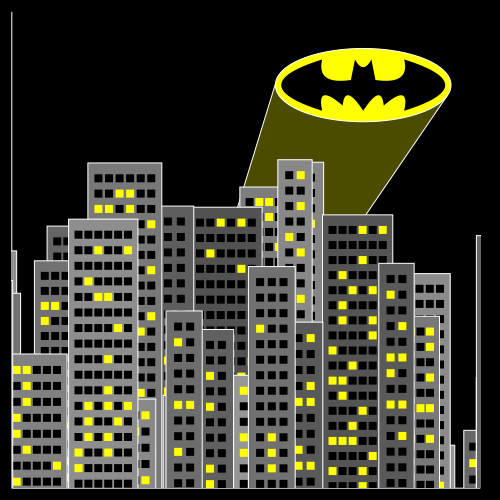

In [5]:
# Holy plotting, Batman!
batman = Plots.scale(make_batman(), 0.07, 0.07, (0,0))
batman = translate(batman, 0.7, 1.23)
plot!(batman, fillcolor = :black, linewidth=0,size=(500,500))

In [34]:
png(Pkg.dir("ExamplePlots", "docs", "examples", "img", "batman"))